# <div style="color:#025B8E; background:#F7ADEE; padding:10px; margin:10px; border-radius:20px; font-size:30px; text-align:center">Analyzing Paris Olympics</div>

In [1]:
# Imporing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# loading dataset
df = pd.read_csv("/kaggle/input/paris-2024-olympics-medals/olympics2024.csv")
df.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [3]:
# shape
df.shape

(91, 7)

In [4]:
# inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [5]:
# description
df.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [6]:
# cheking null data
df.isnull().sum()

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [7]:
# duplicate data
df.duplicated().sum()

0

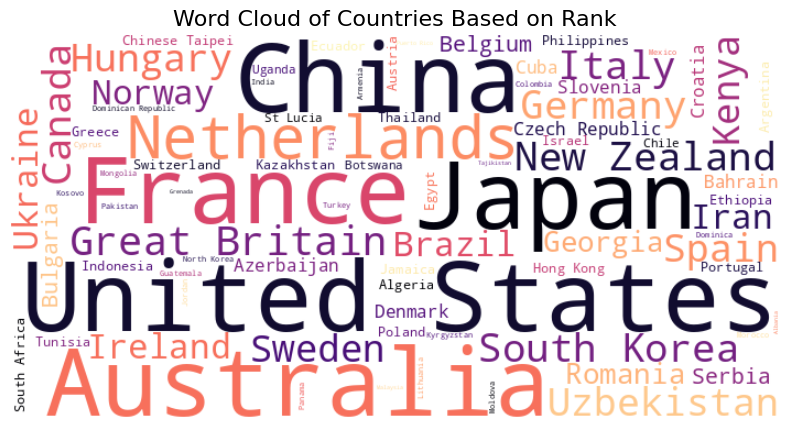

In [8]:
# Plotting Cloud for All Countries
df['Frequency'] = df['Rank'].max() - df['Rank'] + 1

country_freq = dict(zip(df['Country'], df['Frequency']))
wordcloud = WordCloud(max_words=91, width=700, height=350, background_color='white', colormap='magma',
              contour_color='black', contour_width=4, collocations=False, random_state=42).generate_from_frequencies(country_freq)

plt.figure(figsize=(25, 5))
plt.imshow(wordcloud, interpolation='bilinear', )
plt.axis('off')
plt.title('Word Cloud of Countries Based on Rank', fontsize=16)
plt.show()


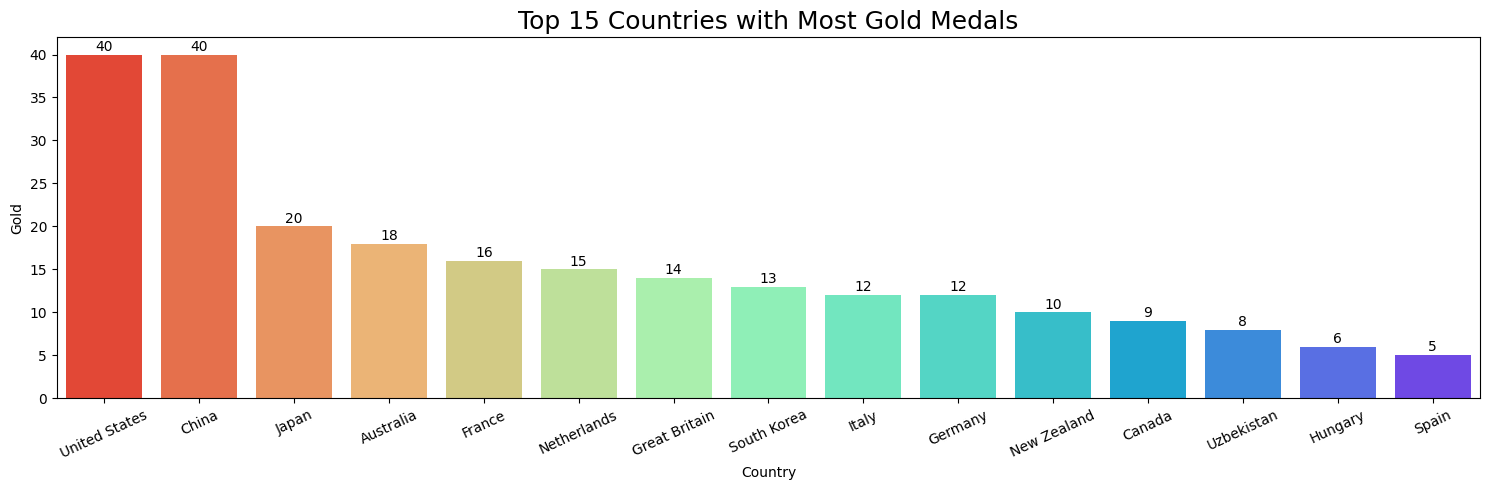

In [9]:
# Top 15 Countries with Most Gold Medals
plt.figure(figsize=(15,5))
sns.barplot(data=df.nlargest(15, 'Gold'), x="Country", y="Gold", palette='rainbow_r')
plt.xticks(rotation=25)
plt.title("Top 15 Countries with Most Gold Medals", fontsize=18)

for i, value in enumerate(df.nlargest(15, 'Gold')['Gold']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

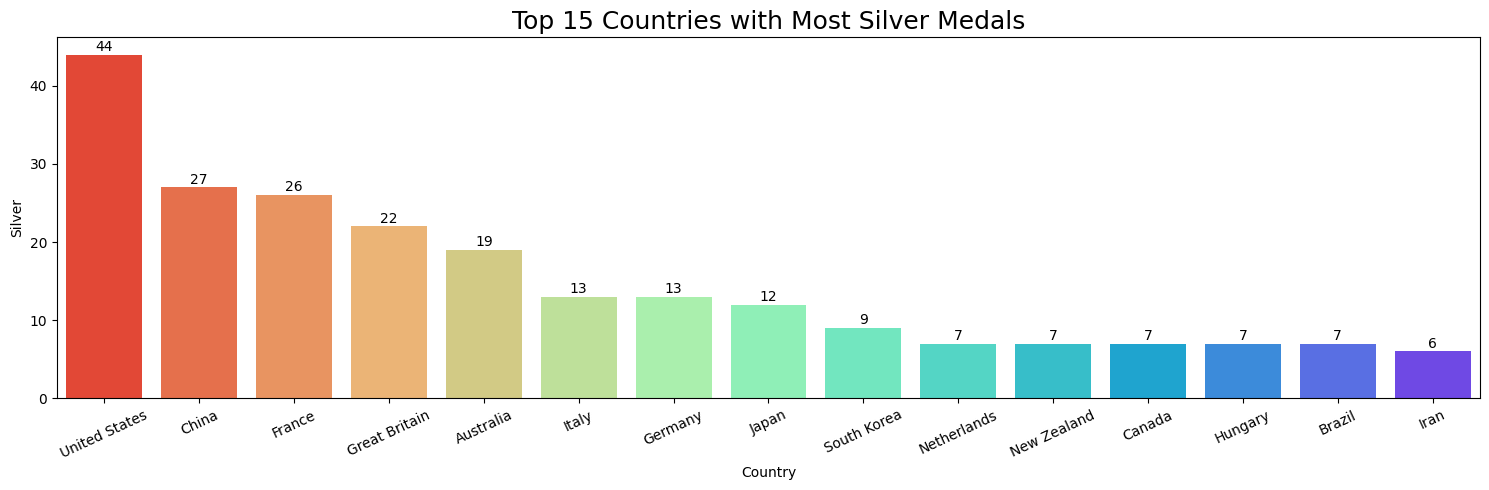

In [10]:
# Top 15 Countries with Most Silver Medals
plt.figure(figsize=(15,5))
sns.barplot(data=df.nlargest(15, 'Silver'), x="Country", y="Silver", palette='rainbow_r')
plt.xticks(rotation=25)
plt.title("Top 15 Countries with Most Silver Medals", fontsize=18)

for i, value in enumerate(df.nlargest(15, 'Silver')['Silver']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

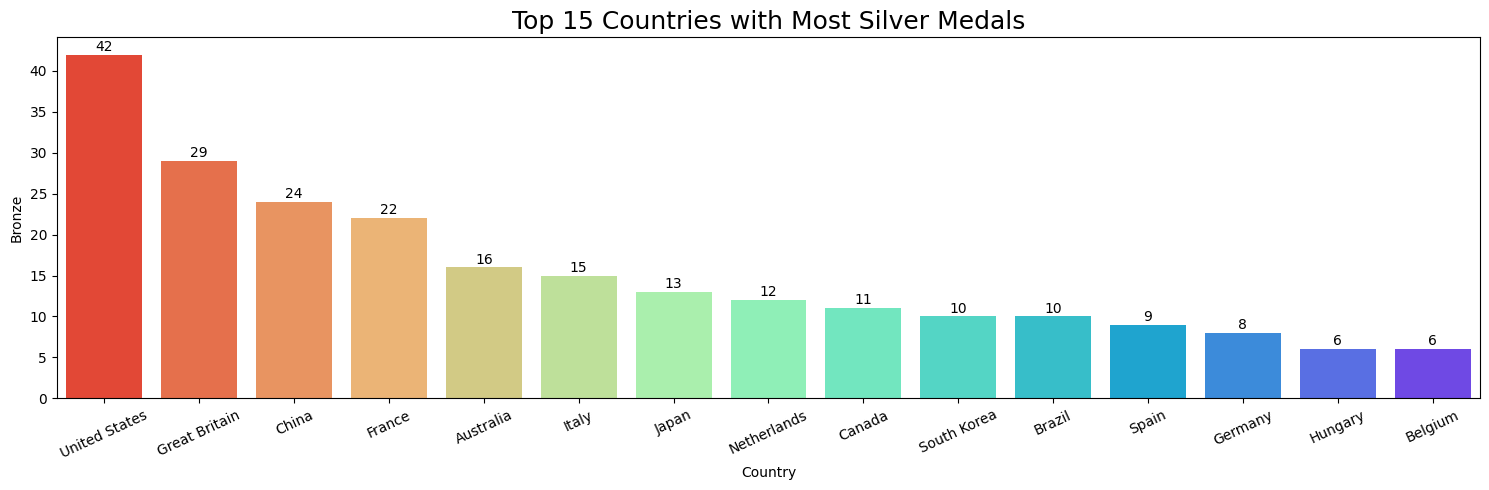

In [11]:
# Top 15 Countries with Most Bronze Medals
plt.figure(figsize=(15,5))
sns.barplot(data=df.nlargest(15, 'Bronze'), x="Country", y="Bronze", palette='rainbow_r')
plt.xticks(rotation=25)
plt.title("Top 15 Countries with Most Silver Medals", fontsize=18)

for i, value in enumerate(df.nlargest(15, 'Bronze')['Bronze']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

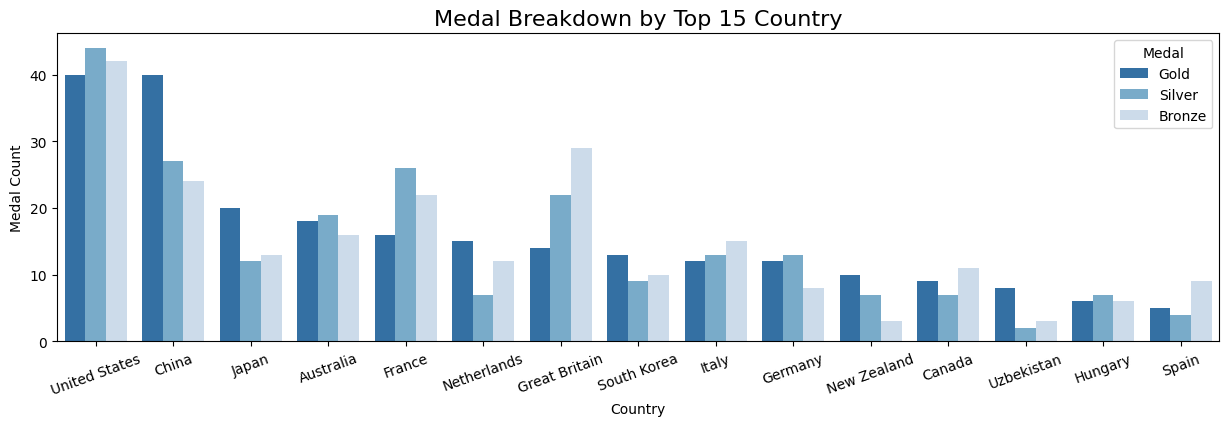

In [12]:
# Medal Breakdown by Country
df_top10 = df.head(15).set_index('Country')
df_melted = df_top10[['Gold', 'Silver', 'Bronze']].reset_index().melt(id_vars='Country', var_name='Medal', value_name='Count')

plt.figure(figsize=(15,4))
sns.barplot(x='Country', y='Count', hue='Medal', data=df_melted, palette='Blues_r')
plt.title('Medal Breakdown by Top 15 Country', size=16)
plt.ylabel('Medal Count')
plt.xticks(rotation=20)
plt.legend(title='Medal')
plt.show()

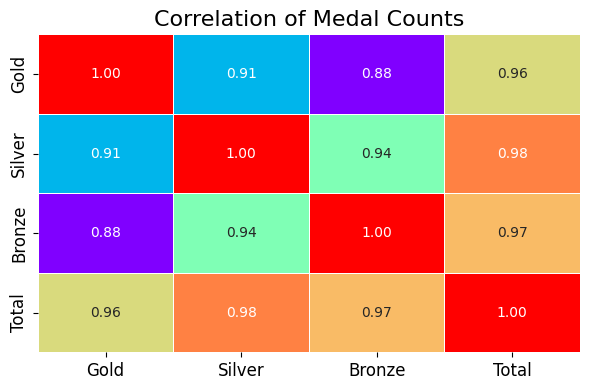

In [13]:
# Correlation between medal counts
plt.figure(figsize=(6, 4))  

# Generate heatmap
sns.heatmap(df[['Gold', 'Silver', 'Bronze', 'Total']].corr(), 
            annot=True,  
            cmap="rainbow",
            linewidths=0.5,         
            fmt='.2f',              
            cbar=False) 

plt.title('Correlation of Medal Counts', fontsize=16)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)               
plt.tight_layout() 
plt.show()

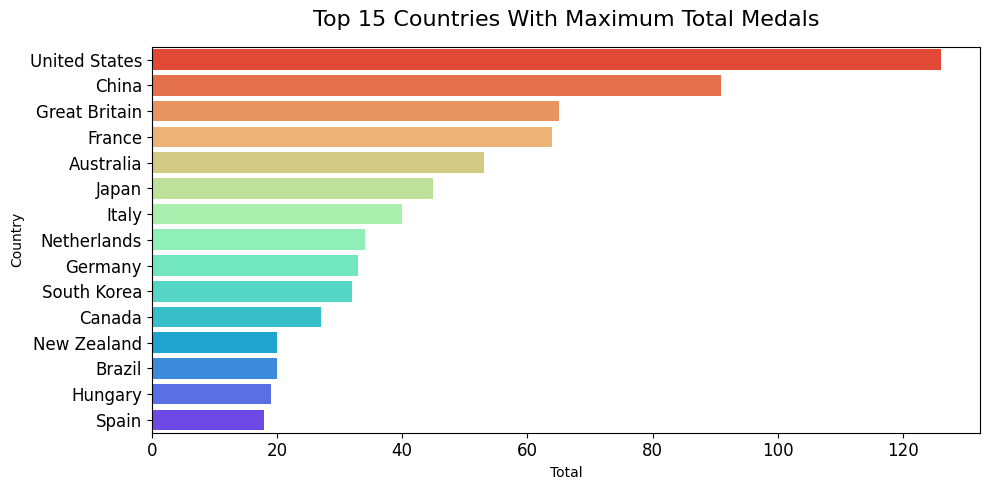

In [14]:
# Countries With Maximum Total Medals
plt.figure(figsize=(10, 5))
sns.barplot(data=df.nlargest(15, 'Total'), y='Country', x='Total', palette='rainbow_r')
plt.title('Top 15 Countries With Maximum Total Medals', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

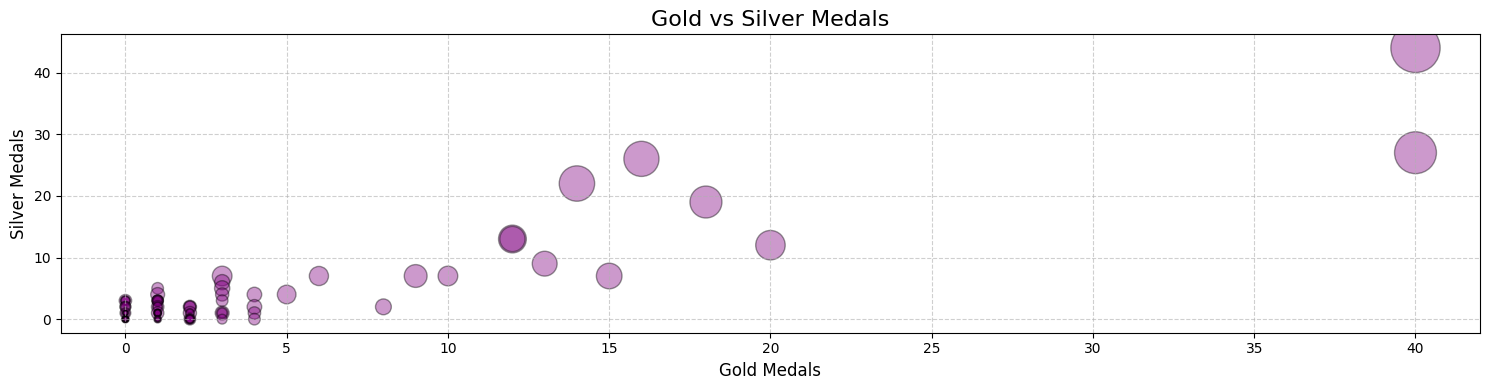

In [15]:
# Gold vs Silver Medals
plt.figure(figsize=(15, 4))
plt.scatter(df['Gold'], df['Silver'], s=df['Total']*10, alpha=0.4, color='purple', edgecolors='black')
plt.title('Gold vs Silver Medals', fontsize=16)
plt.xlabel('Gold Medals', fontsize=12)
plt.ylabel('Silver Medals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
